In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
file_path = "python_jobs.csv"
df = pd.read_csv(file_path)
df = df.drop(columns=['link'])
df.head()

,title,exp,company,salary,cities,tags
0,Python Developer у Стартап,0-1,ESUPPORT,$1000–2500,NaN,"Python,API,AI"
1,Стажер Python Developer для УНКД,0-1,"ГО ""УНКД""",$300–500,віддалено,"Python,API"
2,Junior Python розробник,0-1,Apriorit,NaN,"Київ, Дніпро, віддалено","Python,Flask,Git,SQL,Docker,AWS,Kubernetes"
3,Python Developer,0-1,HOLYWATER,NaN,"Київ, за кордоном, віддалено","Python,SQL,REST,API"
4,Python backend developer,1-3,Receptor.AI,NaN,віддалено,"Python,Django,Git,SQL,API,Docker,PostgreSQL,AI..."


In [15]:
df.columns = ['Position', 'Experience', 'Company', 'Salary', 'Location', 'Skills']
df.head()

,Position,Experience,Company,Salary,Location,Skills
0,Python Developer у Стартап,0-1,ESUPPORT,$1000–2500,NaN,"Python,API,AI"
1,Стажер Python Developer для УНКД,0-1,"ГО ""УНКД""",$300–500,віддалено,"Python,API"
2,Junior Python розробник,0-1,Apriorit,NaN,"Київ, Дніпро, віддалено","Python,Flask,Git,SQL,Docker,AWS,Kubernetes"
3,Python Developer,0-1,HOLYWATER,NaN,"Київ, за кордоном, віддалено","Python,SQL,REST,API"
4,Python backend developer,1-3,Receptor.AI,NaN,віддалено,"Python,Django,Git,SQL,API,Docker,PostgreSQL,AI..."


In [23]:
import re

df.replace('NaN', None, inplace=True)

def salary_to_numeric(salary):
    if pd.isna(salary):
        return None
    salary = re.sub(r'[^\d–]', '', salary)
    parts = salary.split('–')
    if len(parts) == 2:
        try:
            return (float(parts[0]) + float(parts[1])) / 2
        except ValueError:
            return None
    elif len(parts) == 1:
        try:
            return float(parts[0])
        except ValueError:
            return None
    return None

df['Salary Numeric'] = df['Salary'].apply(salary_to_numeric)

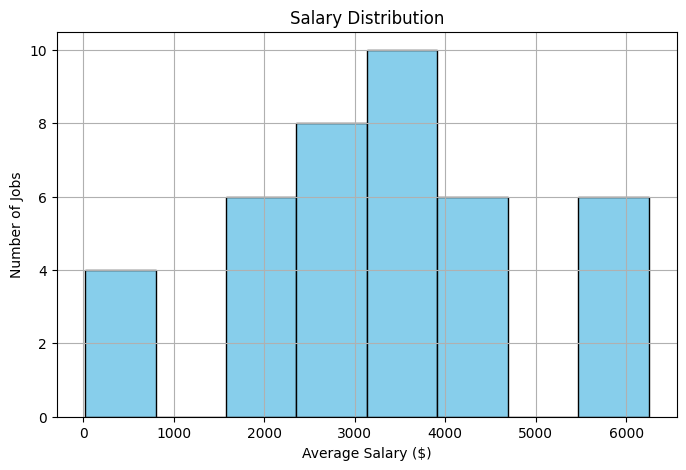

In [32]:
plt.figure(figsize=(8, 5))
plt.hist(df['Salary Numeric'].dropna(), bins=8, color='skyblue', edgecolor='black')
plt.title('Salary Distribution')
plt.xlabel('Average Salary ($)')
plt.ylabel('Number of Jobs')
plt.grid(True)
plt.show()

In [40]:
from collections import Counter

skills_list = ','.join(df['Skills'].dropna()).split(',')
skills_counter = Counter(skills_list)
skills_df = pd.DataFrame(skills_counter.items(), columns=['Skill', 'Count'])
skills_df = skills_df.sort_values(by='Count', ascending=False).head(10)

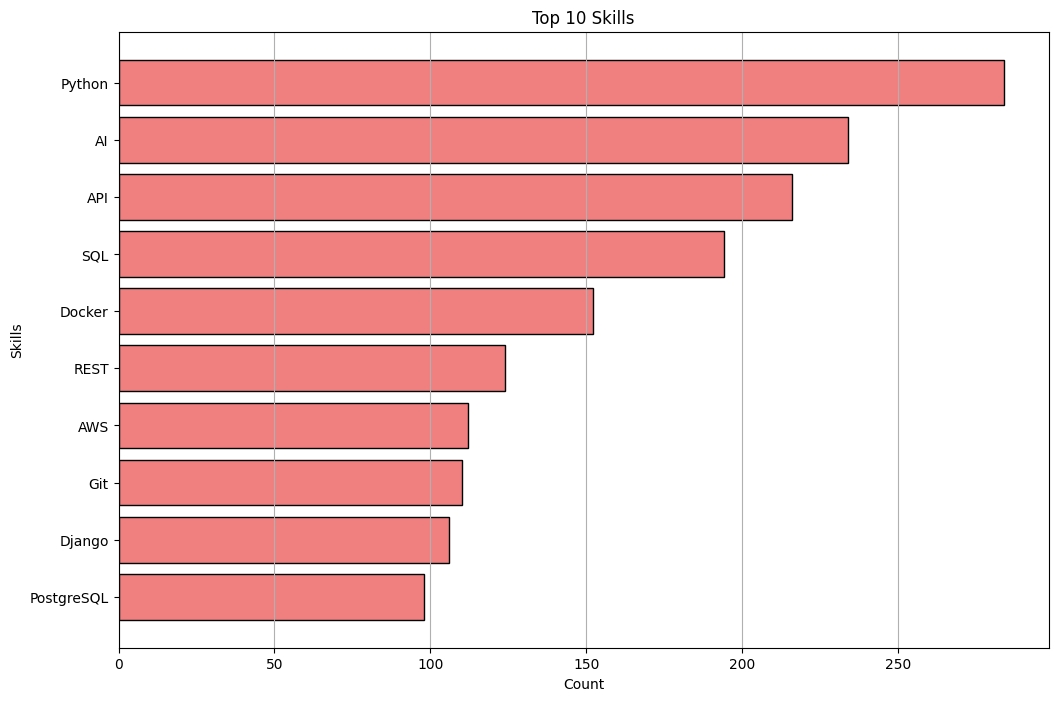

In [29]:
plt.figure(figsize=(12, 8))
plt.barh(skills_df['Skill'], skills_df['Count'], color='lightcoral', edgecolor='black')
plt.title('Top 10 Skills')
plt.xlabel('Count')
plt.ylabel('Skills')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()